# Visualization (Part 5): Seaborn

In this notebook, you will learn seaborn package, including:
 - box plot
 - scatter plot
 - kde plot
 - pair plot
 - joint plot
 - Subplotting with matplotlib and seaborn

 

In [7]:
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

## 0. Loading Iris dataset

In [8]:
# Load the Iris flower dataset
iris=sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# Let's see how many examples we have of each species
print (iris["species"].value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


## 1. Box plot

In [13]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

In [14]:
# Make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="species", figsize=(12, 6))

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

## 2. Scatter plot

In [15]:
# Use Pandas dataframes to make a scatterplot of the Iris features.
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris)

<AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]', ylabel='sepal_width'>

In [16]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

## 3. Histogram and KDE plot

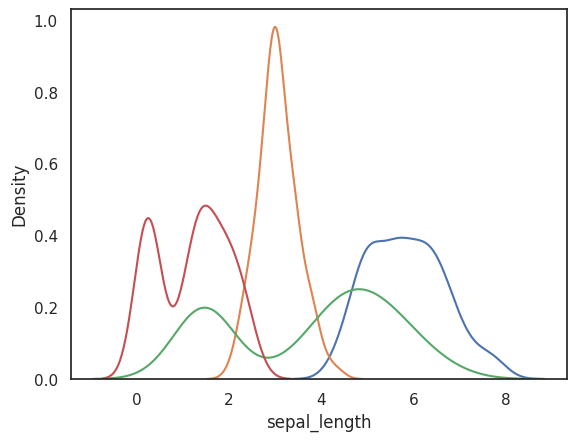

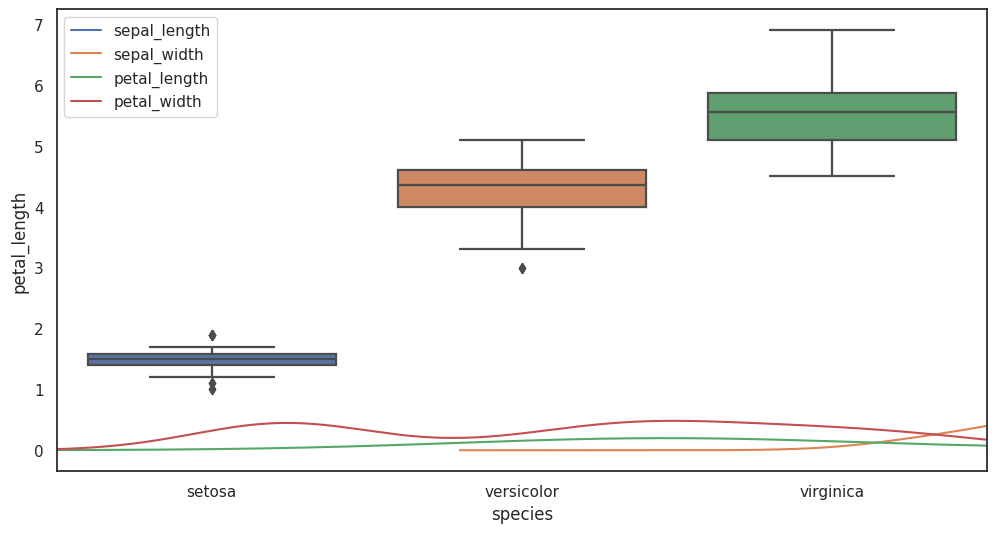

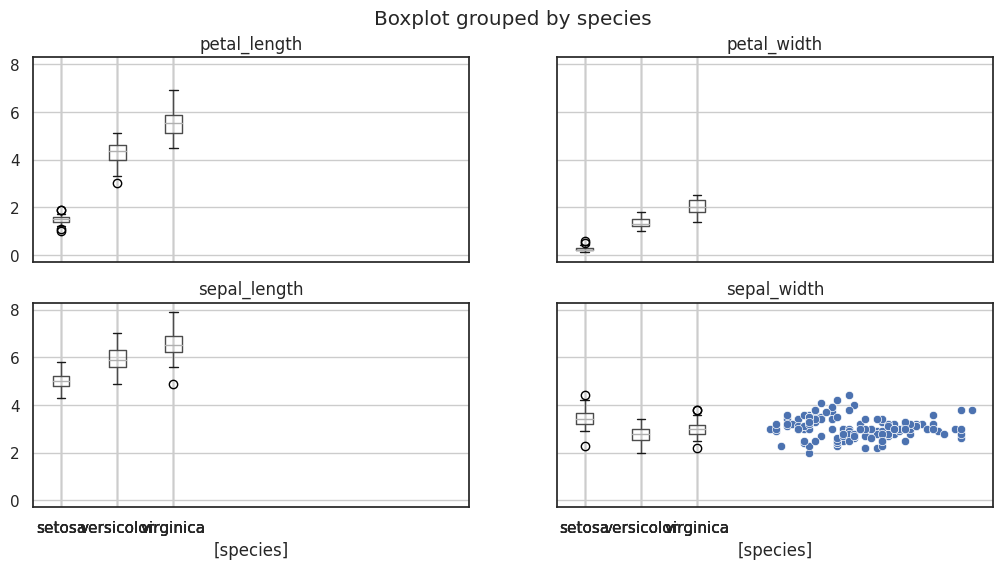

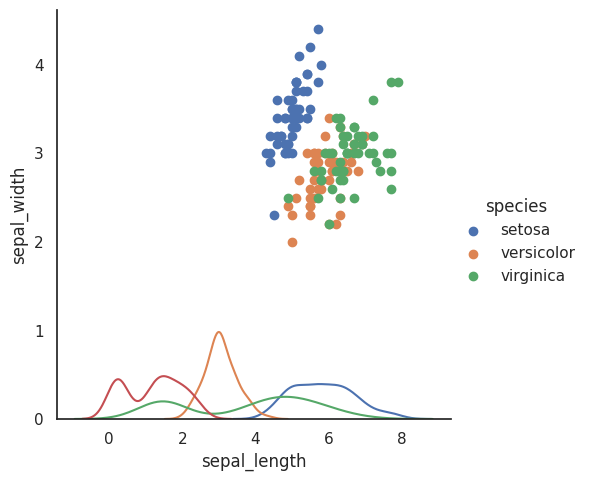

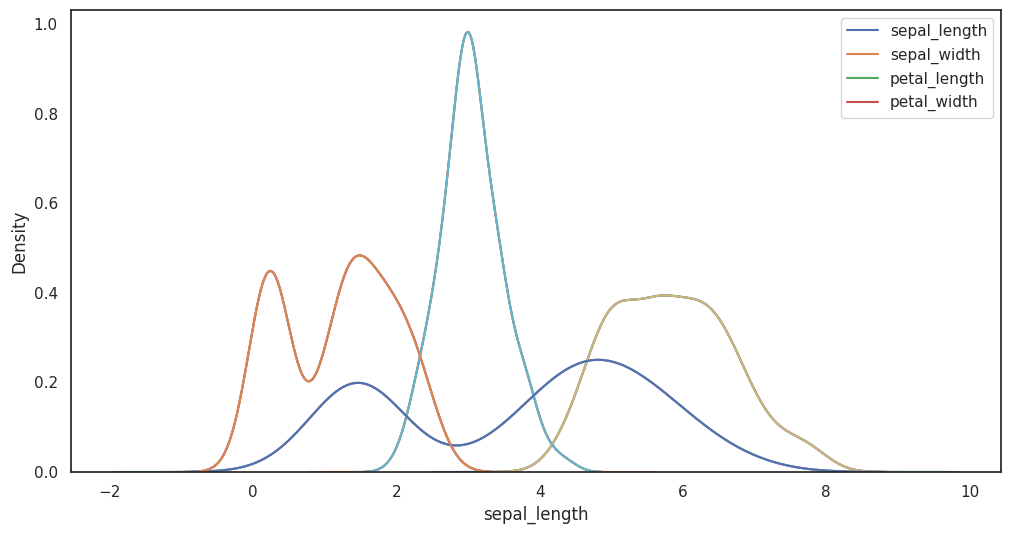

In [21]:
for col in iris.columns[:-1]:
    sns.kdeplot(iris[col])
plt.show()

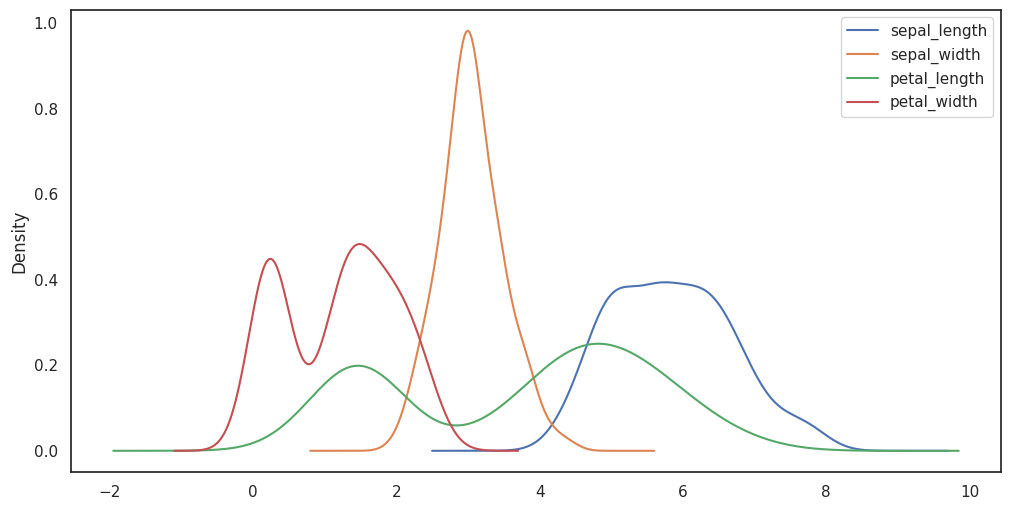

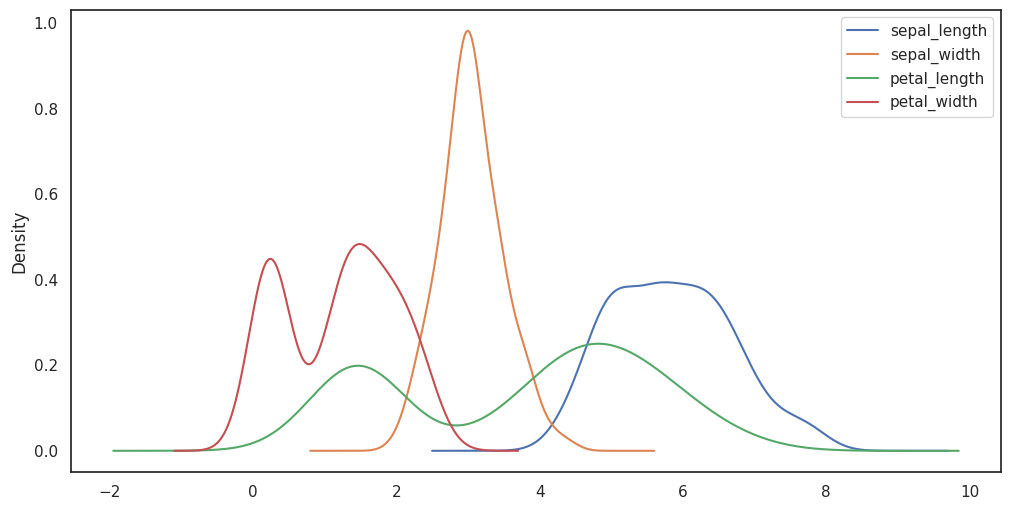

In [23]:
# Make a boxplot with Pandas on each feature split out by species
iris.plot.kde(by="species", figsize=(12, 6))
plt.show()

In [19]:
# do kde plots for all features together
sns.kdeplot(iris.drop(columns=iris.columns[-1], axis=1))

ValueError: If using all scalar values, you must pass an index

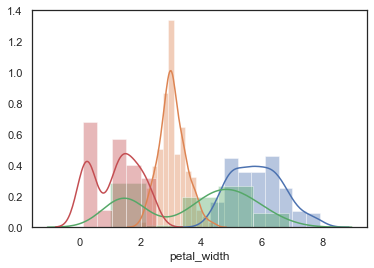

In [39]:
# histogram and kde combined
for col in iris.columns[:-1]:
    sns.distplot(iris[col])

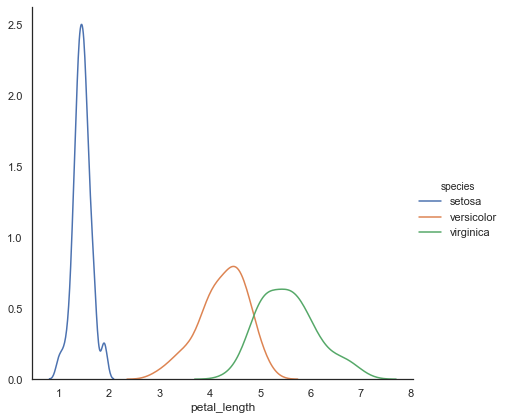

In [40]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

## 4. Pair plot

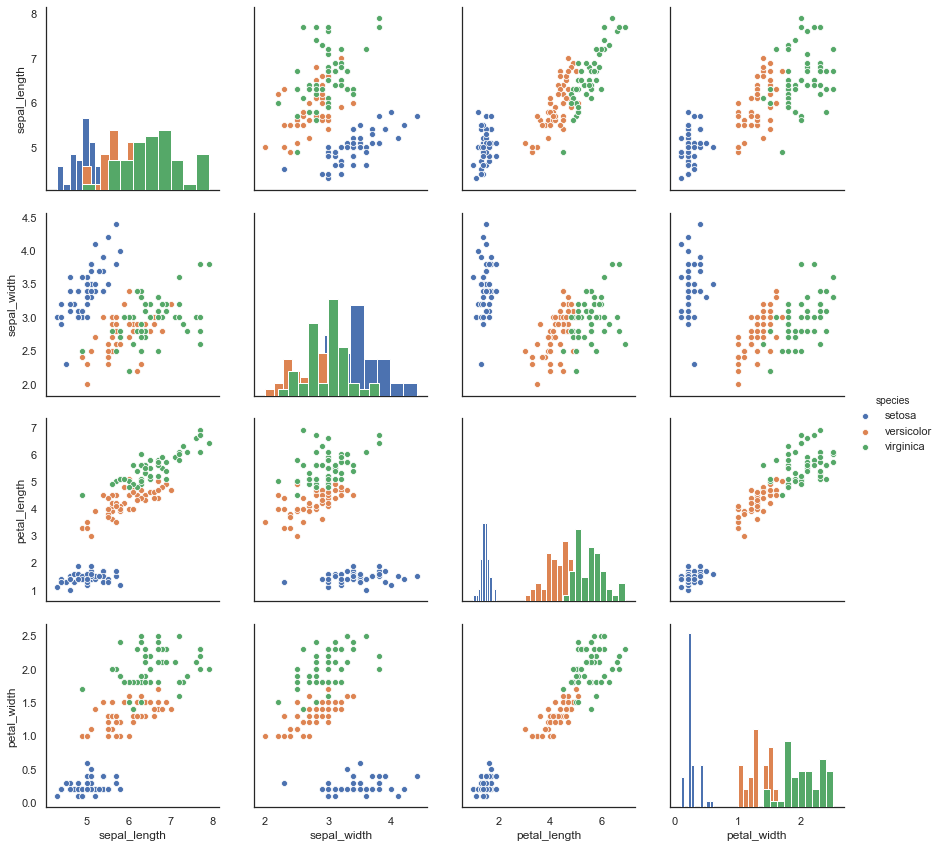

In [41]:
# Pairplot, which shows the bivariate relation between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="species", size=3, diag_kind="hist")

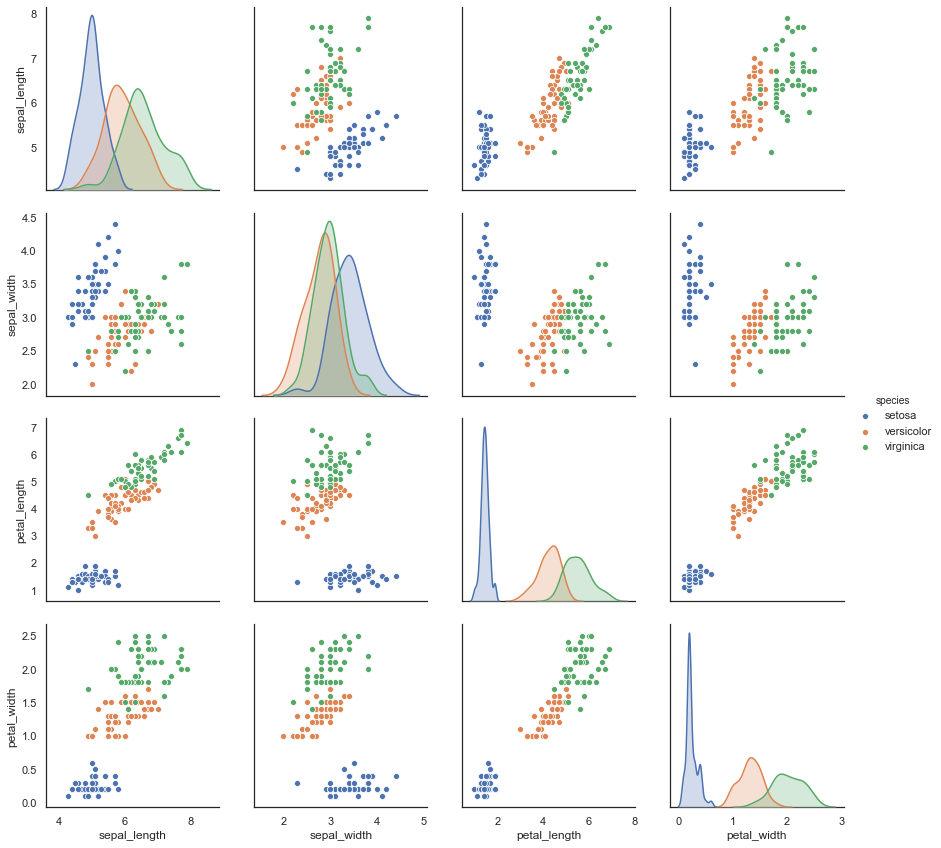

In [42]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="species", size=3, diag_kind="kde")


plt.show()

## 5. Join plot

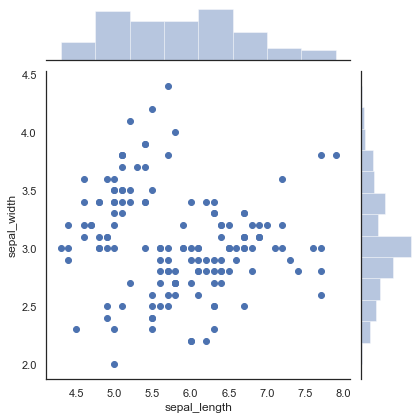

In [43]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

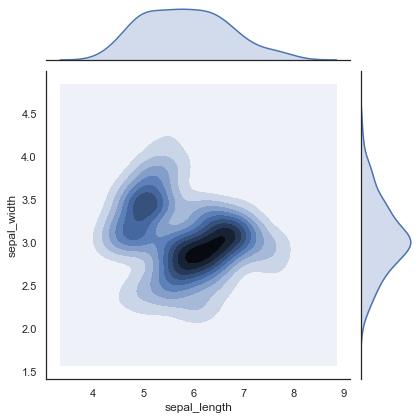

In [44]:
# A seaborn jointplot shows bivariate scatterplots and univariate kde
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='kde')

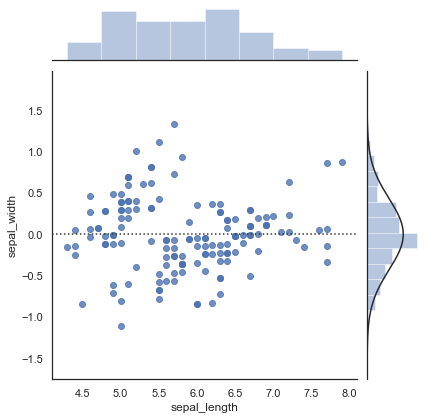

In [45]:
# A seaborn jointplot shows bivariate hexagonally based hostogram and univariate histogram
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='resid')

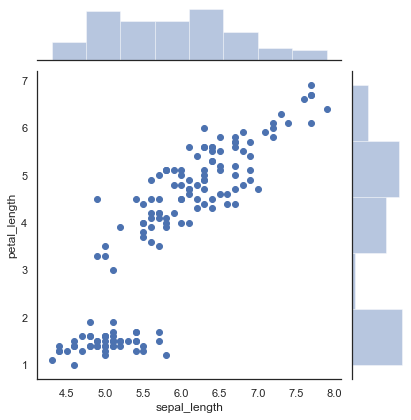

In [46]:
# A seaborn jointplot shows bivariate regression and univariate histogram + kde
sns.jointplot(x="sepal_length", y="petal_length", data=iris, kind='scatter')

## 6. Subplotting with matplotlib and seaborn 
 https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8